In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19   #transfer learning model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [300, 300]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [4]:

# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [7]:
folders

['/content/drive/MyDrive/Dataset/train/rock',
 '/content/drive/MyDrive/Dataset/train/paper',
 '/content/drive/MyDrive/Dataset/train/scissors']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (300, 300),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1082 images belonging to 3 classes.


In [14]:
training_set

In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (300, 300),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 372 images belonging to 3 classes.


In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  #callbacks=[early_stop],verbose=True
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
34/34 [==============================] - 1482s 44s/step - loss: 1.0386 - accuracy: 0.7311 - val_loss: 0.4755 - val_accuracy: 0.9059
Epoch 2/2
34/34 [==============================] - 1443s 43s/step - loss: 0.0380 - accuracy: 0.9871 - val_loss: 0.1170 - val_accuracy: 0.9409


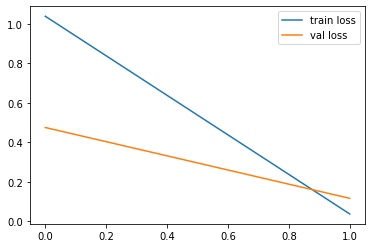

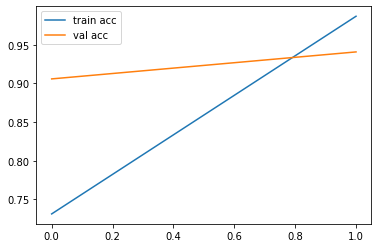

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/model_vgg19.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[1.90634630e-03, 5.34740335e-04, 9.97558951e-01],
       [1.57648858e-04, 9.88373995e-01, 1.14683239e-02],
       [9.99170542e-01, 1.41908195e-05, 8.15277162e-04],
       ...,
       [1.64314359e-02, 1.41396141e-03, 9.82154608e-01],
       [9.91769314e-01, 7.24390848e-03, 9.86785861e-04],
       [9.96073127e-01, 5.32330829e-04, 3.39452340e-03]], dtype=float32)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_vgg19.h5')

[[1. 0. 0.]]
0
paper


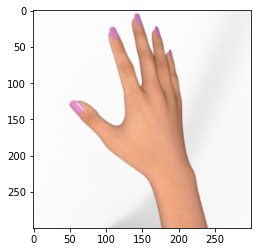

In [33]:
img = image.load_img('/content/drive/MyDrive/Dataset/test/paper/testpaper01-02.png', target_size=(300,300))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)

values = classes[0]
index1 = np.argmax(values)
print(index1)
if index1==0:
    print('paper')
elif index1==1:
    print('rock')
else:
    print('scissors')